# <u> Dissecting racial bias in an algorithm used to manage the health of populations </u>

# Part A: Data Access

In [9]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

In [2]:
df

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48779,0.611517,0,800.0,0.0,NaN,NaN,NaN,1.090000,148.0,white,...,0,0,0,0,0,0,0,0,0,0
48780,2.615933,0,2200.0,0.0,112.0,NaN,41.4,0.810000,172.0,white,...,0,1,0,0,1,0,0,1,1,1
48781,1.358926,0,800.0,0.0,105.0,NaN,NaN,NaN,NaN,white,...,0,1,0,0,1,0,0,1,1,0
48782,10.990318,0,1300.0,0.0,132.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,3,3


# Part B: Reproduce Fig. 1

Visualize risk score percentiles against mean number of active chronic conditions within that percentile. For example, I thought I would try spliting out male and female patients. I also think the figure looks a bit nicer with axes inverted. 

/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_43650/4100923281.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['percentile_risk'] = df_female['risk_score_t'].rank(pct=True) * 100
/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_43650/4100923281.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female["chronic_illness_mean"] = df_female.groupby("percentile_risk")["gagne_sum_t"].transform('mean')
/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_43650/41009

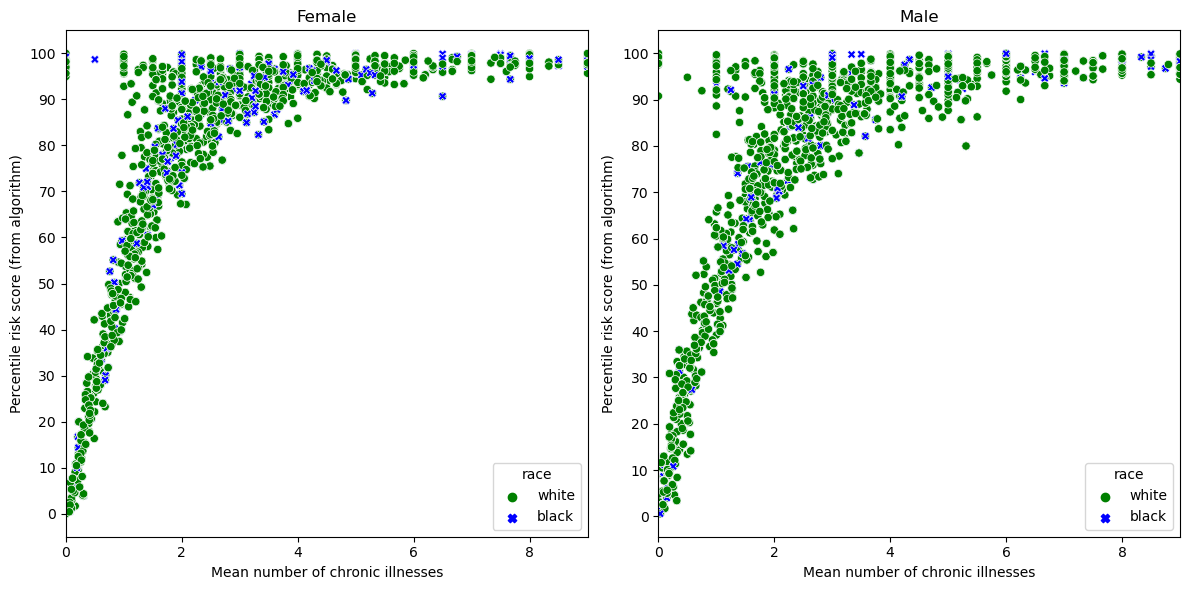

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
custom_palette = ["green", "blue"]

# Plot for females
df_female = df[df["dem_female"] == True]

# change risk score to percentage
df_female['percentile_risk'] = df_female['risk_score_t'].rank(pct=True) * 100

# get chronic illeness mean
df_female["chronic_illness_mean"] = df_female.groupby("percentile_risk")["gagne_sum_t"].transform('mean')

sns.scatterplot(data=df_female, x="chronic_illness_mean", y="percentile_risk", hue="race", style="race", ax=axes[0], palette=custom_palette)
axes[0].set_xlabel('Mean number of chronic illnesses')
axes[0].set_ylabel('Percentile risk score (from algorithm)')
axes[0].set_title('Female')
axes[0].set_yticks(range(0, 101, 10))
axes[0].set_xticks(range(0, 9, 2))
axes[0].set_xlim(0, 9)

# Plot for males
df_male = df[df["dem_female"] == False]

# change risk score to percentage
df_male['percentile_risk'] = df_male['risk_score_t'].rank(pct=True) * 100

# get chronic illeness mean
df_male["chronic_illness_mean"] = df_male.groupby("percentile_risk")["gagne_sum_t"].transform("mean")

sns.scatterplot(data=df_male, x="chronic_illness_mean", y="percentile_risk", hue="race", style="race", ax=axes[1], palette=custom_palette)
axes[1].set_xlabel('Mean number of chronic illnesses')
axes[1].set_ylabel('Percentile risk score (from algorithm)')
axes[1].set_title('Male')
axes[1].set_yticks(range(0, 101, 10))
axes[1].set_xticks(range(0, 9, 2))
axes[1].set_xlim(0, 9)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [31]:
df_female["chronic_illness_mean"]

1        2.333333
2        0.097959
3        0.159341
4        2.500000
5        1.298246
           ...   
48776    1.028986
48780    0.941176
48781    0.408696
48782    3.000000
48783    0.532110
Name: chronic_illness_mean, Length: 30763, dtype: float64

Include a brief discussion of the meaning of this plot. Suppose that Patient A is Black, that Patient B is White, and that both Patient A and Patient B have exactly the same chronic illnesses. Are Patient A and Patient B equally likely to be referred to the high-risk care management program?

# Part C: Reproduce Fig. 3

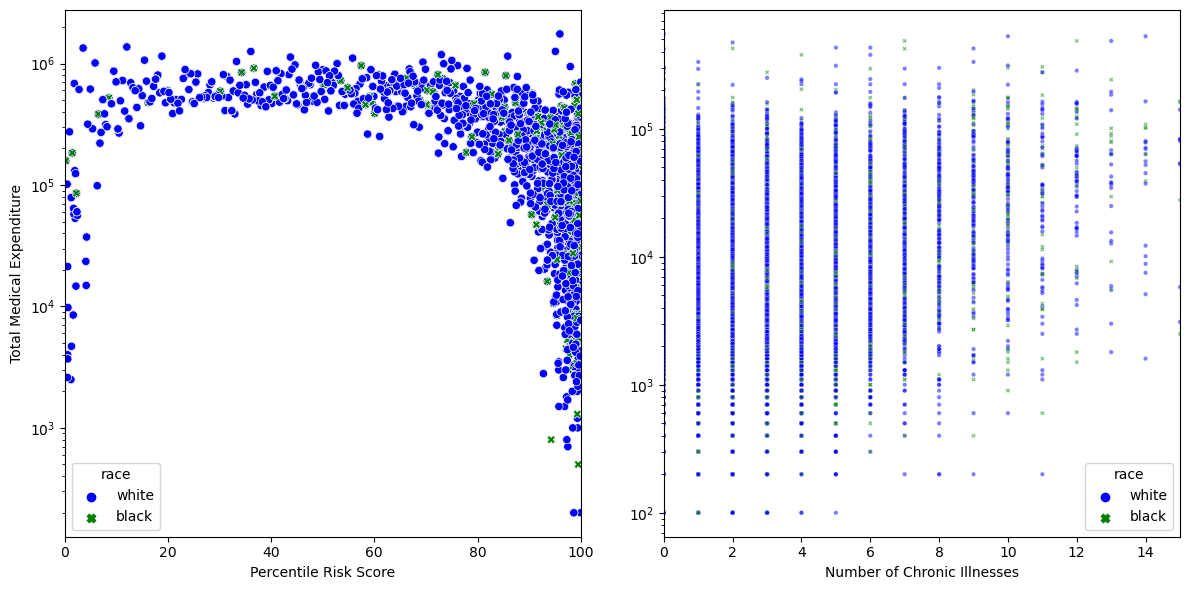

In [47]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
custom_palette = ["blue", "green"]

# change risk score to percentage
df['percentile_risk'] = df['risk_score_t'].rank(pct=True) * 100

df["cost_sum"] = df.groupby("percentile_risk")["cost_t"].transform('sum')

# Plot for females
sns.scatterplot(data=df, y="cost_sum", x="percentile_risk", hue="race", style="race", ax=axes[0], palette=custom_palette)
axes[0].set_xlabel('Percentile Risk Score')
axes[0].set_ylabel('Total Medical Expenditure')
axes[0].set_yscale('log')
axes[0].set_xlim(0, 100)

# Plot for males
sns.scatterplot(data=df, y="cost_t", x="gagne_sum_t", hue="race", style="race", ax=axes[1], palette=custom_palette)
axes[1].set_xlabel('Number of Chronic Illnesses')
axes[1].set_ylabel(' ')
axes[1].set_yscale('log')
axes[1].set_xlim(0, 15)

plt.tight_layout()
plt.show()

# Part D: Modeling Cost Disparity

### First, determine the percentage of the patients in the data with 5 or fewer chronic conditions. Does this percentage justify the choice to focus on these patients?

In [52]:
percent_five_cond = (len(df[df["gagne_sum_t"] < 5])/ len(df)) * 100
percent_five_cond

92.99975401771073

It might?

### Create a new column of the data set which is just the logarithm of the cost. This is called a log-transform. We’ll use this as our target variable. Log transforms are common when the target variable varies widely across several orders of magnitude. Because log(0) is undefined, you should subset the data so that patients who incurred $0 in medical costs are removed.

In [57]:
import numpy as np

df["log_cost"] = df["cost_t"].drop(0)
df["log_cost"] = np.log(df["log_cost"])

print(df["log_cost"])
print(df["cost_t"])

0             NaN
1        7.863267
2        6.214608
3        7.170120
4        7.003065
           ...   
48779    6.684612
48780    7.696213
48781    6.684612
48782    7.170120
48783    8.389360
Name: log_cost, Length: 48784, dtype: float64
0        1200.0
1        2600.0
2         500.0
3        1300.0
4        1100.0
          ...  
48779     800.0
48780    2200.0
48781     800.0
48782    1300.0
48783    4400.0
Name: cost_t, Length: 48784, dtype: float64


/Users/lindseyschweitzer/anaconda3/envs/ml-0451/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
